<a href="https://colab.research.google.com/github/camilamaestrelli/Telco-Customer-Churn/blob/main/02_EDA_TelcoCustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue size=10> Telco Customer Churn</font>

# <b><font color=BLUE size=12> Evasão de Clientes da Telco</b>

***
**Author**: [Camila Maestrelli](https://www.linkedin.com/in/camila-maestrelli-leobons/)
***

## <b><font color=green> Etapas do Projeto:


### 1. Definição do Problema
### 2. Importação dos dados
### 3. Entendimento dos dados
### 4. Limpeza dos dados

### <b><font color=green> `5. Análise Exploratória dos Ddados`

### 6. Pré-processamento
### 7. Algoritmo e criação do modelo

### 8. Interpretação do resultado e avaliação do modelo


Importando os dados

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
#!pip install seaborn
import seaborn as sns
!pip install sweetviz
import sweetviz as sv
import plotly.express as px

!pip install pandas-profiling
from pandas_profiling import ProfileReport


import scipy.stats as stats




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 529 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://raw.githubusercontent.com/camilamaestrelli/Telco-Customer-Churn/main/Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv(url)
dados = df.copy()
dados.head()

,index,id_cliente,churn,genero,idoso,parceirx,dependentes,tempo_permanencia,servico_telefone,multiplas_linhas,...,assinatura_tv,assinatura_filmes,contrato,fatura_digital,metodo_pagamento,mensalidade,cobrancas_total,verificacao_cobrancas_total,dif_cobrancas_total,diaria
0,0,0002-ORFBO,Não,Feminino,0,1,1,9,1,Não,...,Sim,Não,Anual,Sim,Cheque,65.6,593.30,590.4,2.90,2.19
1,1,0003-MKNFE,Não,Masculino,0,0,0,9,1,Sim,...,Não,Sim,Mensal,Não,Cheque,59.9,542.40,539.1,3.30,2.00
2,2,0004-TLHLJ,Sim,Masculino,0,0,0,4,1,Não,...,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85,295.6,-14.75,2.46
3,3,0011-IGKFF,Sim,Masculino,1,1,0,13,1,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85,1274.0,-36.15,3.27
4,4,0013-EXCHZ,Sim,Feminino,1,1,0,3,1,Não,...,Sim,Não,Mensal,Sim,Cheque,83.9,267.40,251.7,15.70,2.80


In [ ]:
dados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7043 non-null   int64  
 1   id_cliente                   7043 non-null   object 
 2   churn                        7043 non-null   object 
 3   genero                       7043 non-null   object 
 4   idoso                        7043 non-null   int64  
 5   parceirx                     7043 non-null   int64  
 6   dependentes                  7043 non-null   int64  
 7   tempo_permanencia            7043 non-null   int64  
 8   servico_telefone             7043 non-null   int64  
 9   multiplas_linhas             7043 non-null   object 
 10  servico_internet             7043 non-null   object 
 11  seguranca_online             7043 non-null   object 
 12  backup_online                7043 non-null   object 
 13  protecao_dispositi

In [ ]:
colunas_numericas = list(dados.select_dtypes(include = ['float64']).columns)
colunas_numericas.append('tempo_permanencia')
colunas_numericas

['mensalidade',
 'cobrancas_total',
 'verificacao_cobrancas_total',
 'dif_cobrancas_total',
 'diaria',
 'tempo_permanencia']

In [ ]:
dados.churn = dados.churn.map({'Sim': 1, 'Não':0})
coluna_target = ['churn']

In [ ]:
set(colunas_numericas)

{'cobrancas_total',
 'diaria',
 'dif_cobrancas_total',
 'mensalidade',
 'verificacao_cobrancas_total'}

In [ ]:
outras_colunas = list(set(dados.columns) - set(colunas_numericas) - set(coluna_target))
outras_colunas

['id_cliente',
 'dependentes',
 'fatura_digital',
 'index',
 'metodo_pagamento',
 'contrato',
 'idoso',
 'assinatura_tv',
 'genero',
 'backup_online',
 'parceirx',
 'seguranca_online',
 'assinatura_filmes',
 'servico_telefone',
 'protecao_dispositivo',
 'servico_internet',
 'multiplas_linhas',
 'suporte_tecnico']

## <font color=green> <b>5. Análise Exploratória dos dados

In [ ]:
dados.describe()

,index,churn,idoso,parceirx,dependentes,tempo_permanencia,servico_telefone,mensalidade,cobrancas_total,verificacao_cobrancas_total,dif_cobrancas_total,diaria
count,7043.00000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3623.94775,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,64.761692,2279.734304,2279.581350,0.152953,2.158675
std,2096.40248,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,30.090047,2266.794470,2264.729447,67.202778,1.003088
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,-370.850000,0.610000
25%,1806.50000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.500000,398.550000,394.000000,-28.600000,1.180000
50%,3622.00000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1394.550000,1393.600000,0.000000,2.340000
75%,5442.50000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3786.600000,3786.100000,28.500000,2.990000
max,7266.00000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,8550.000000,373.250000,3.960000


* Nota-se que 26,5% da base de dados entrou em churn (saiu da empresa)

In [ ]:
dados.describe(include=['object'])

,id_cliente,genero,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_filmes,contrato,fatura_digital,metodo_pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Masculino,Não,Fibra,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque Eletrônico
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


                                             |          | [  0%]   00:00 -> (? left)


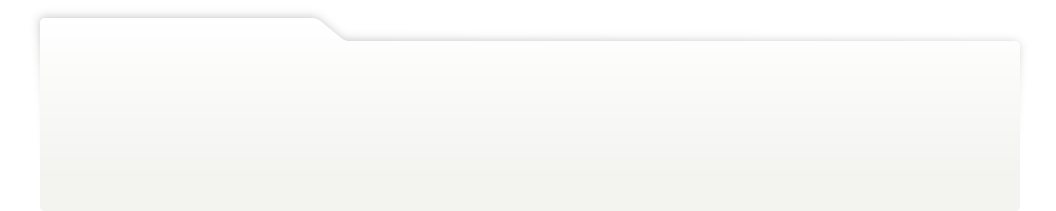
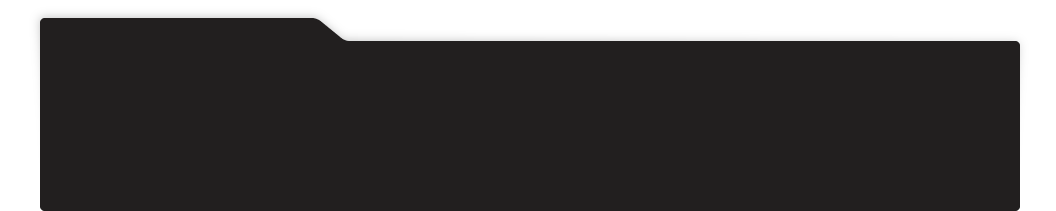
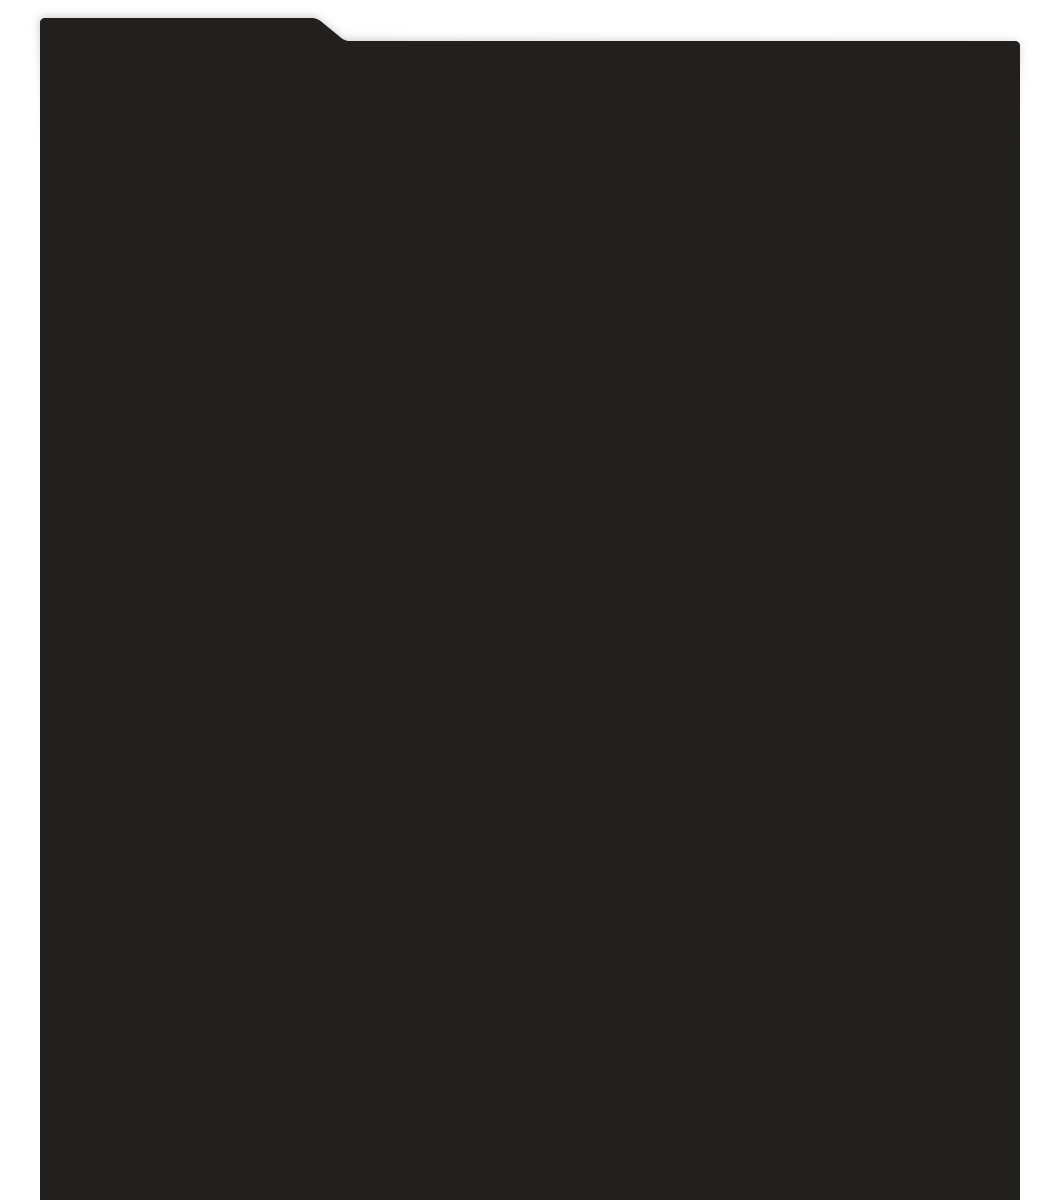
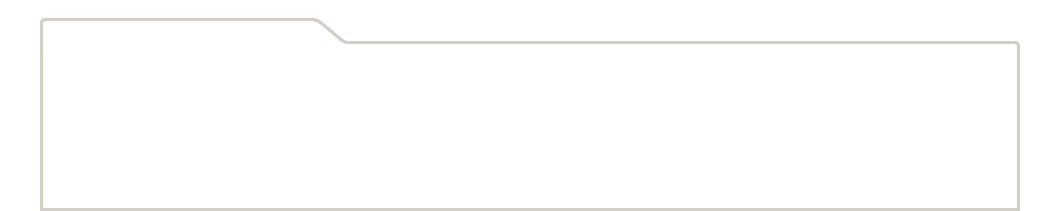
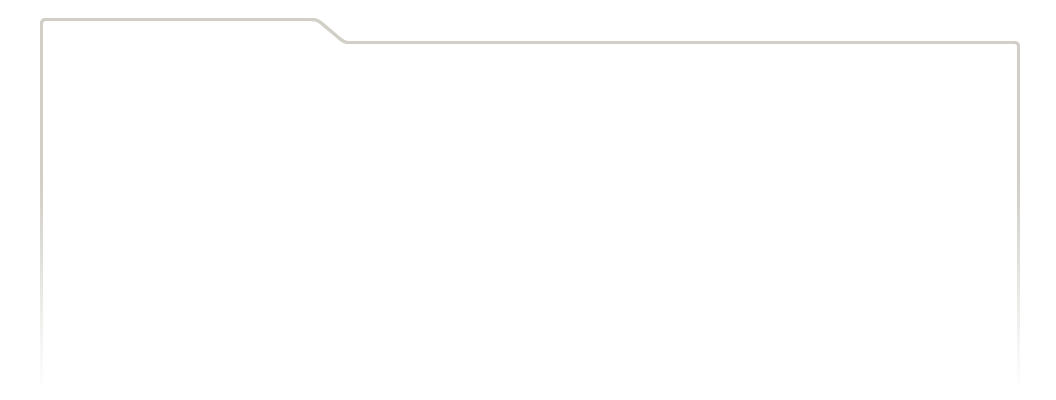
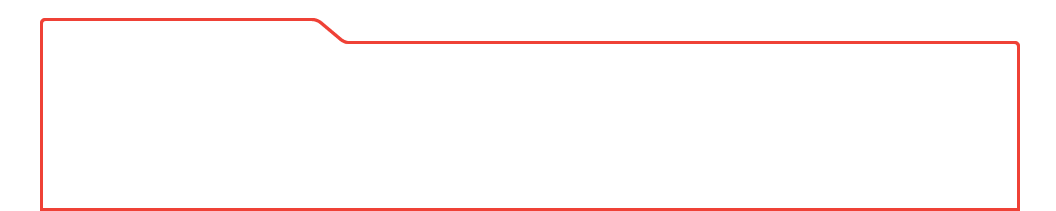
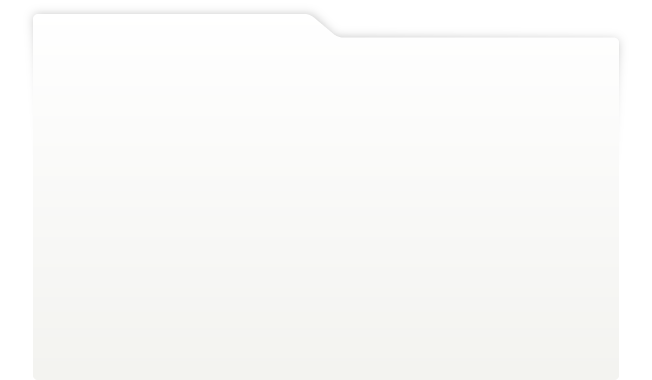
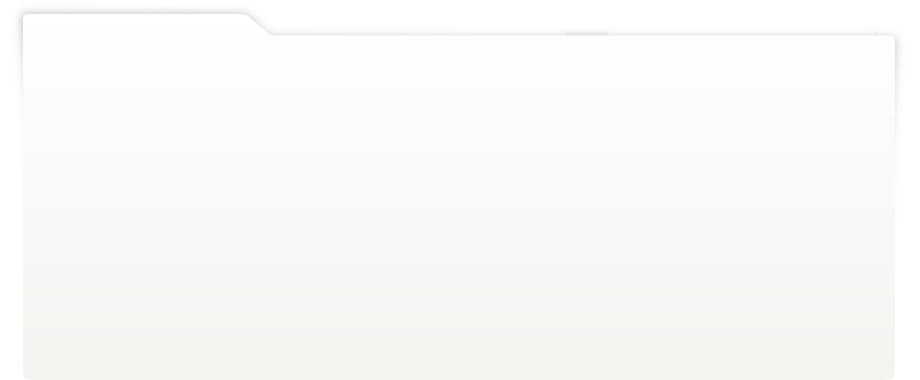
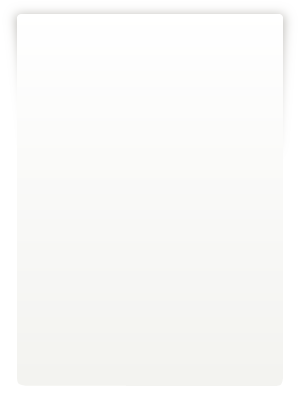
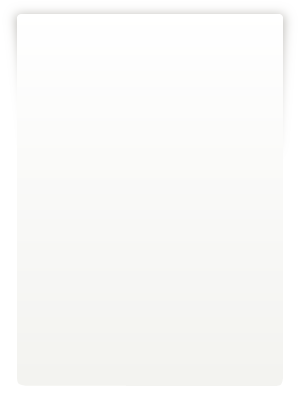
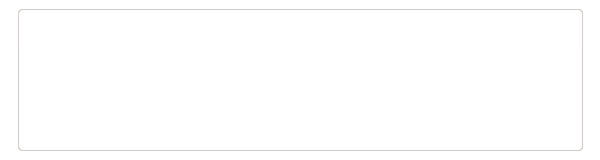
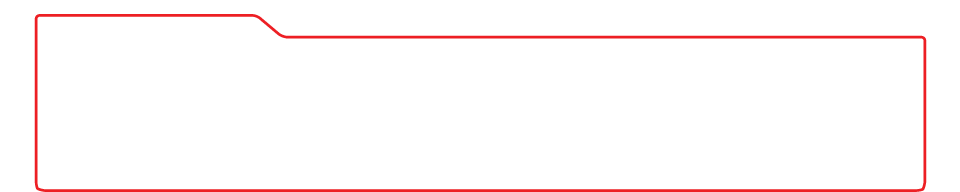
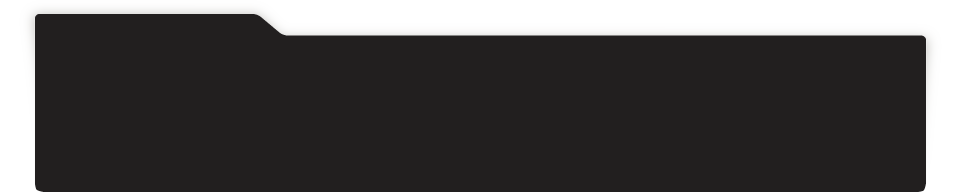
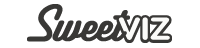
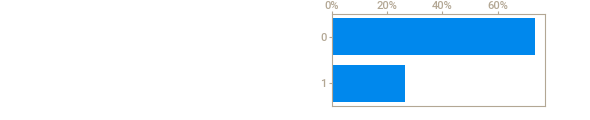
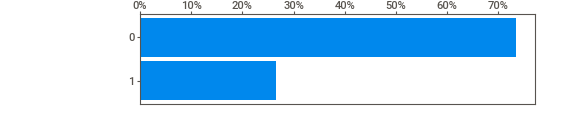
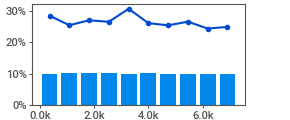
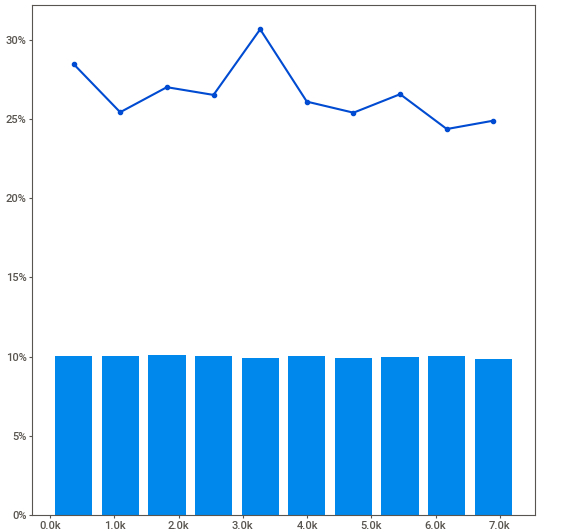
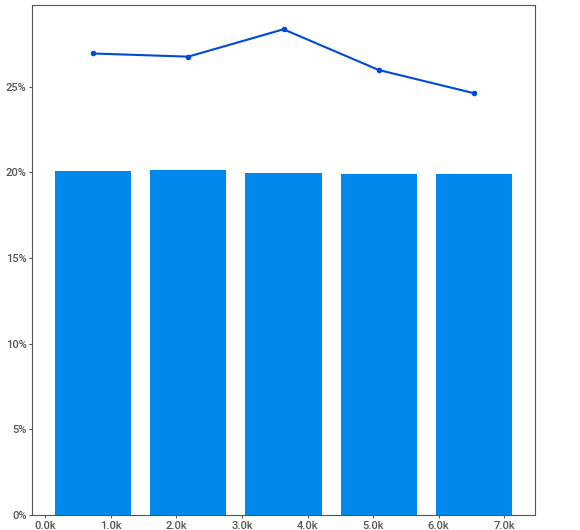
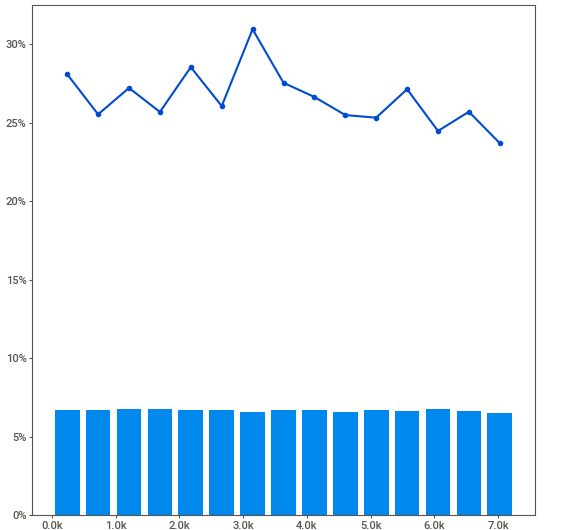
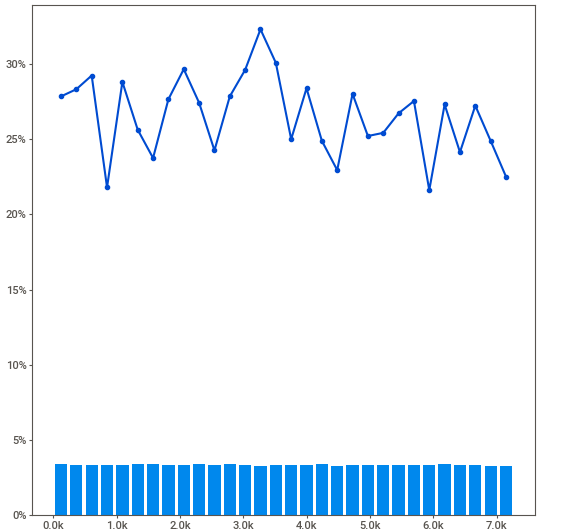
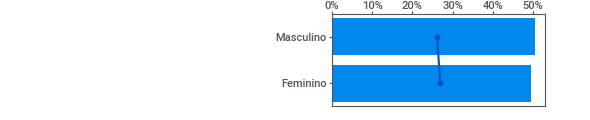
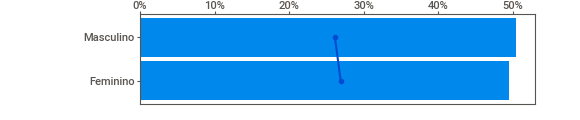
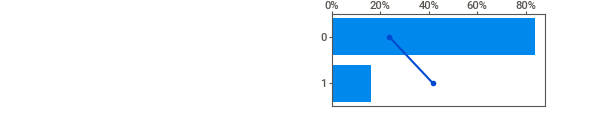
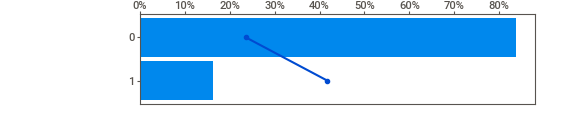
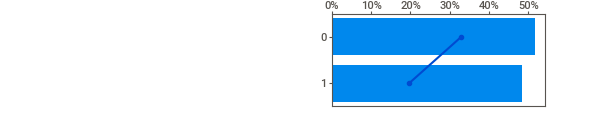
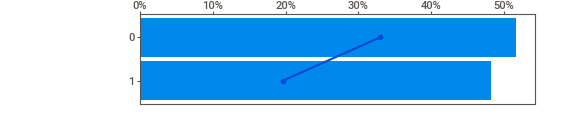
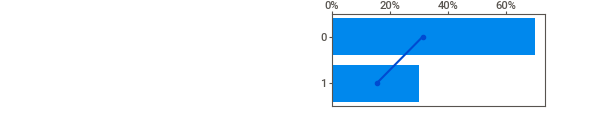
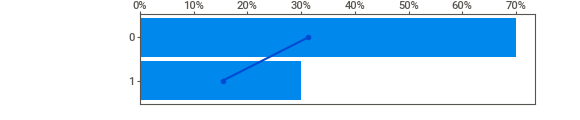
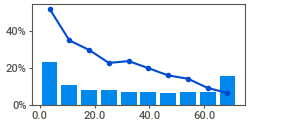
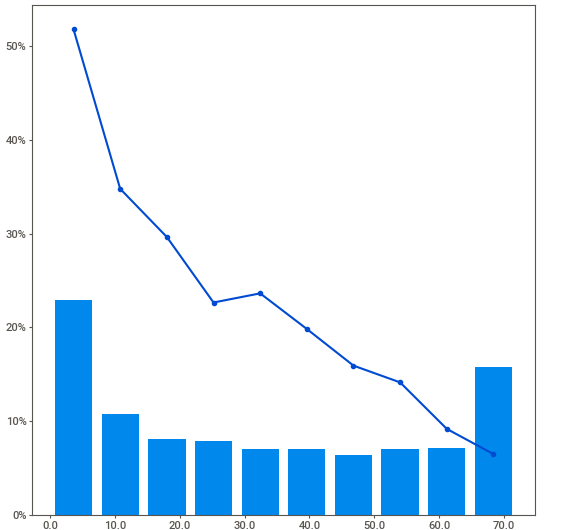
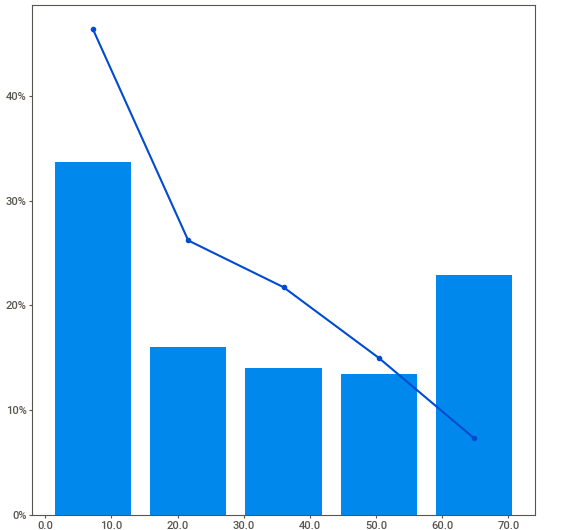
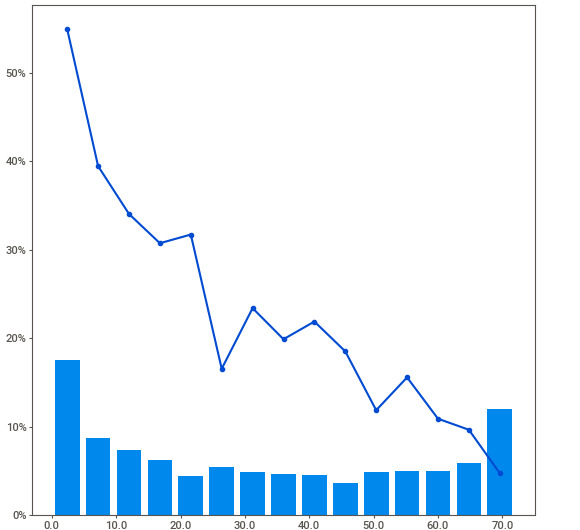
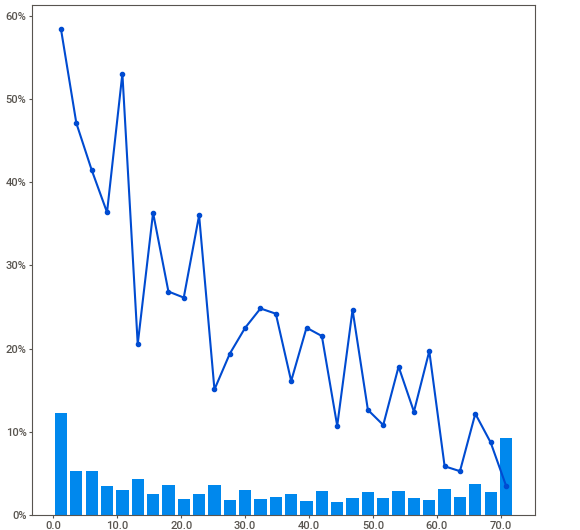
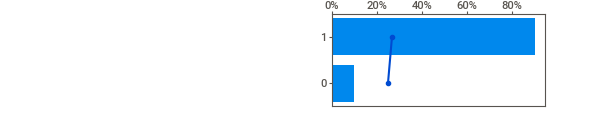
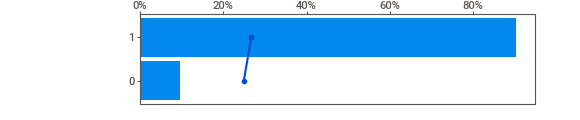
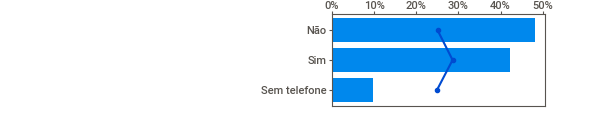
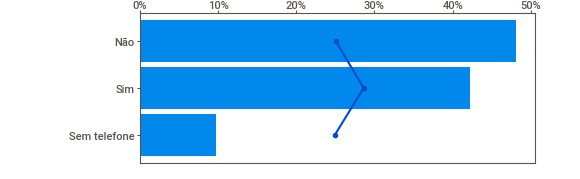
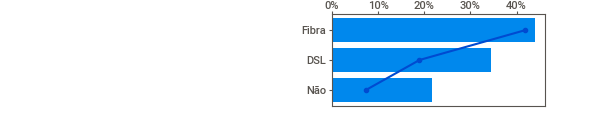
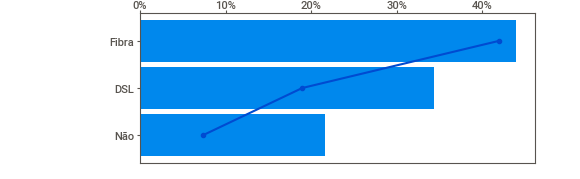
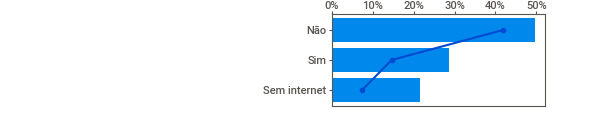
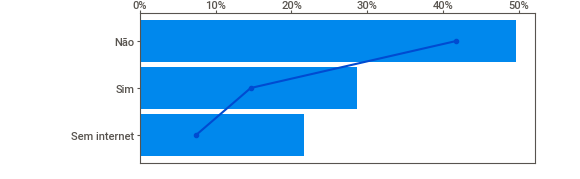
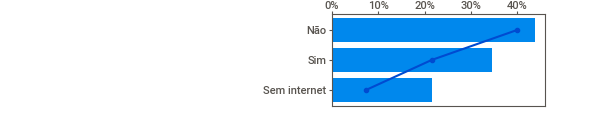
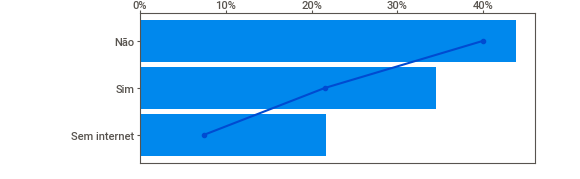
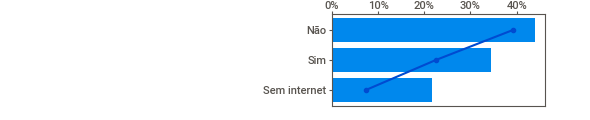
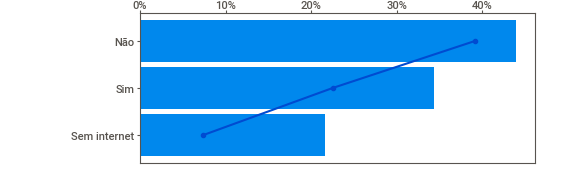
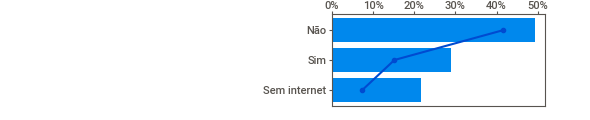
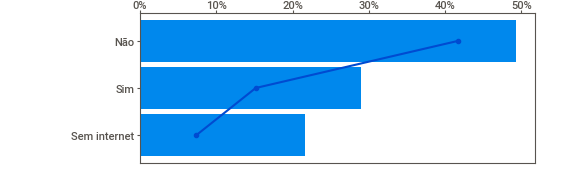
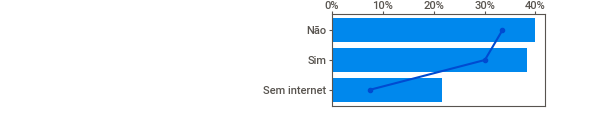
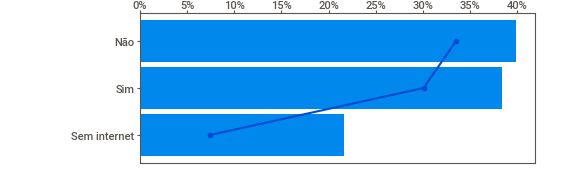
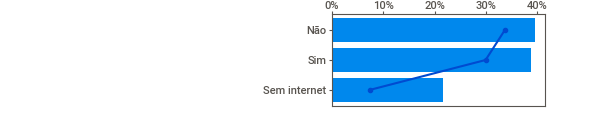
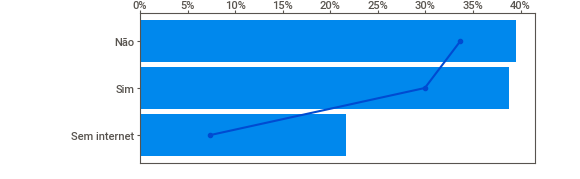
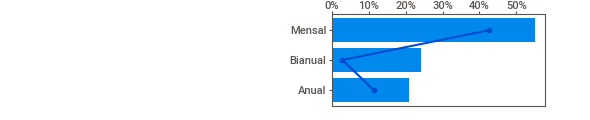
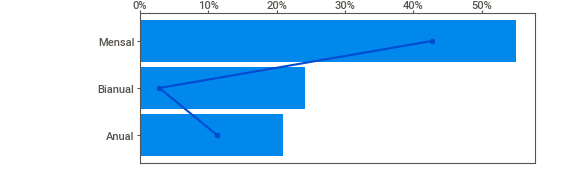
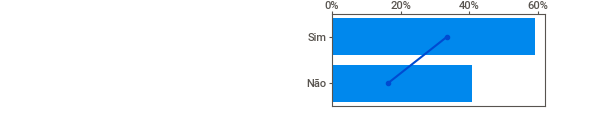
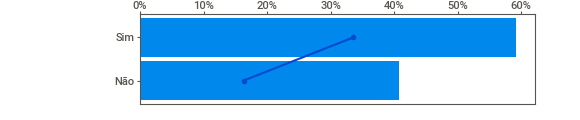
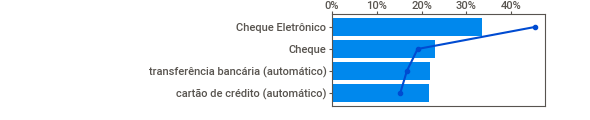
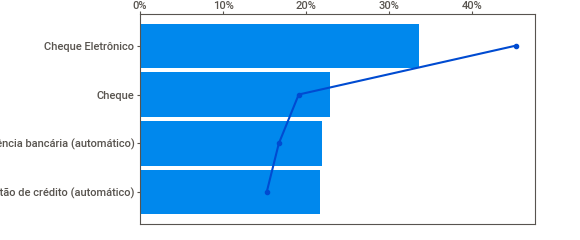
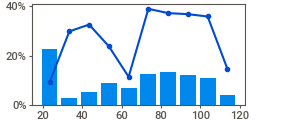
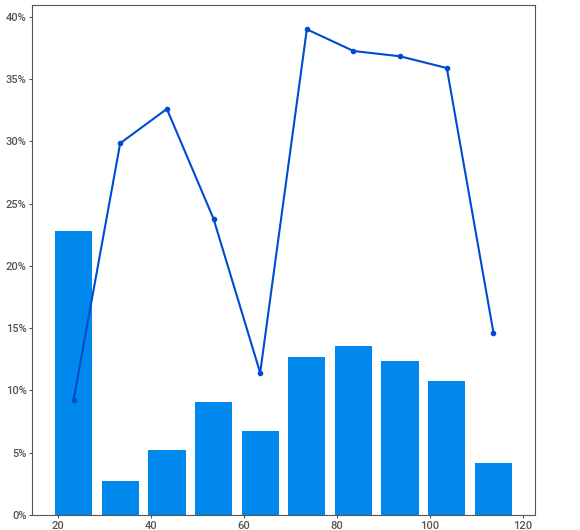
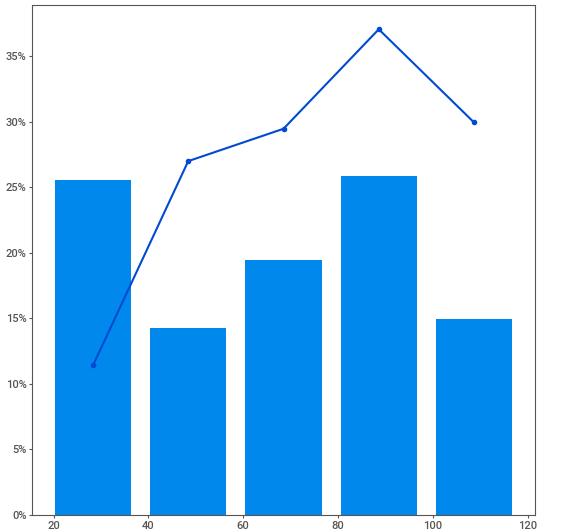
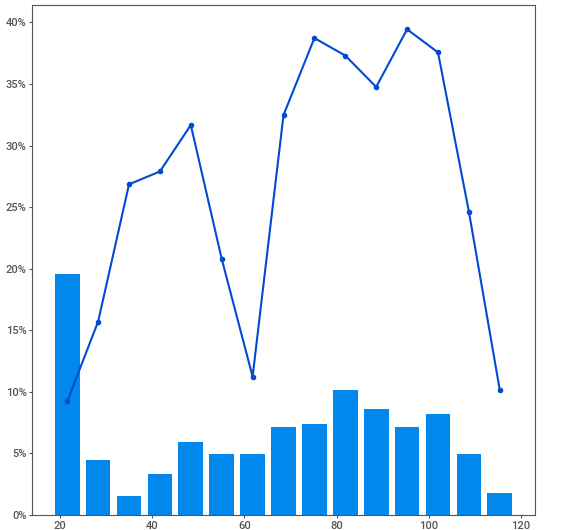
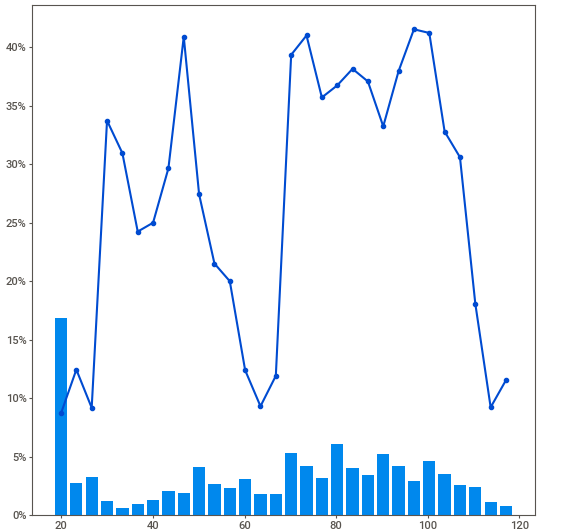
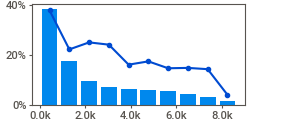
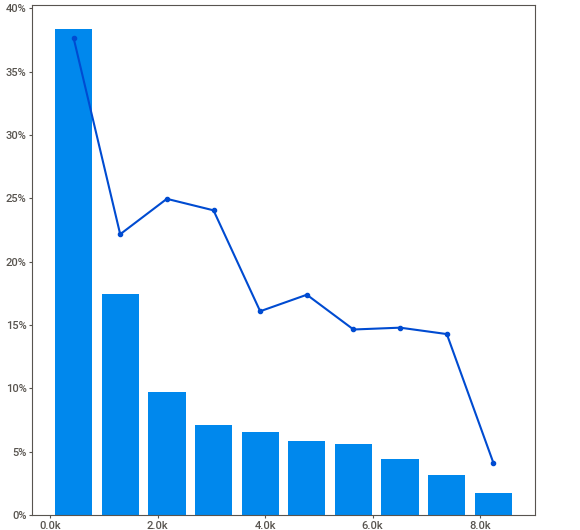
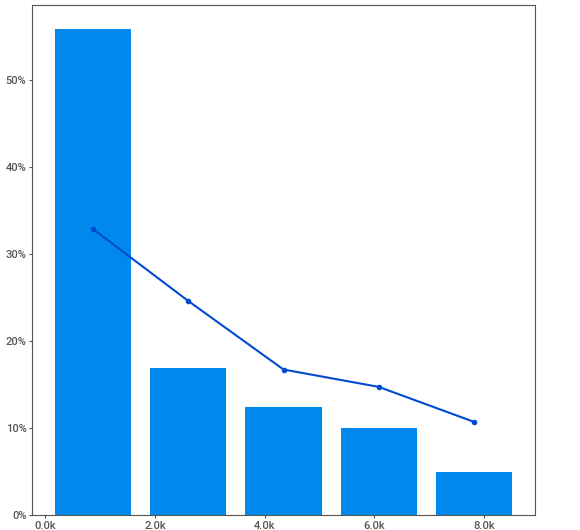
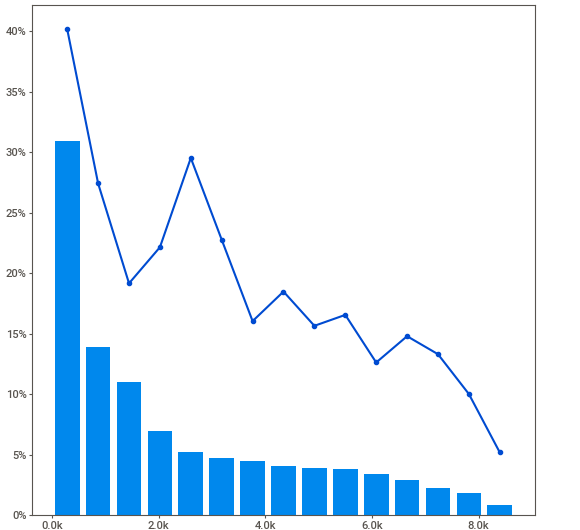
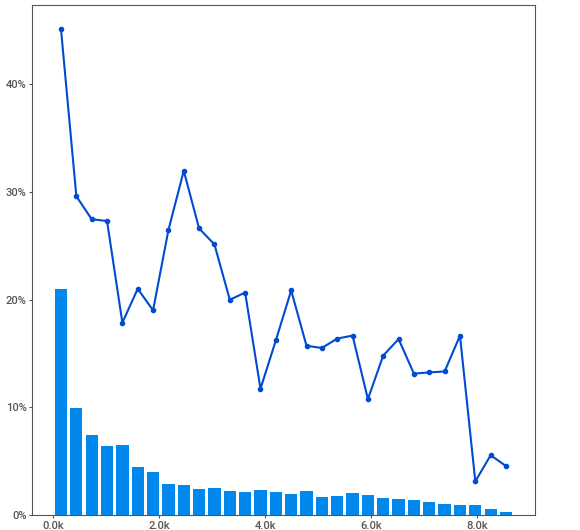
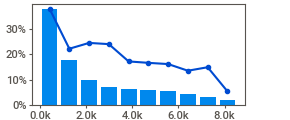
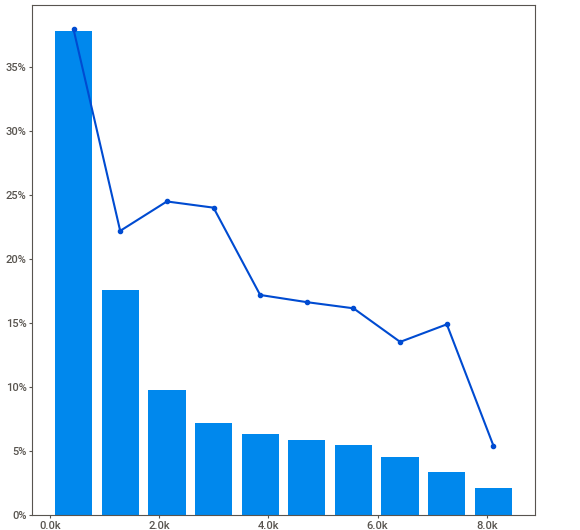
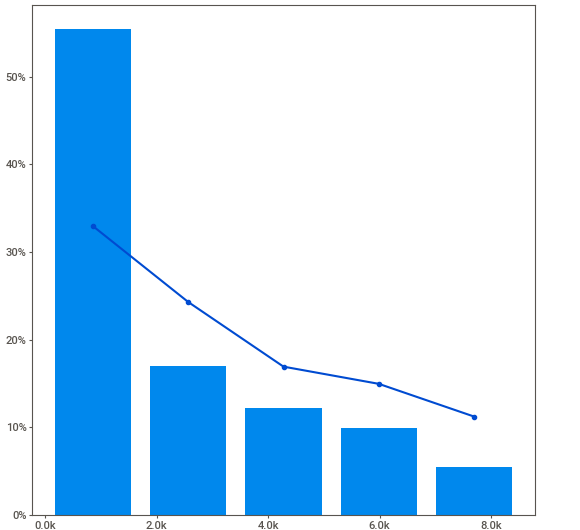
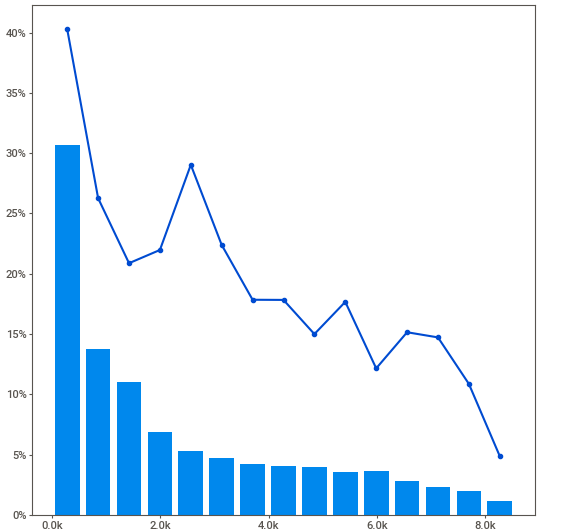
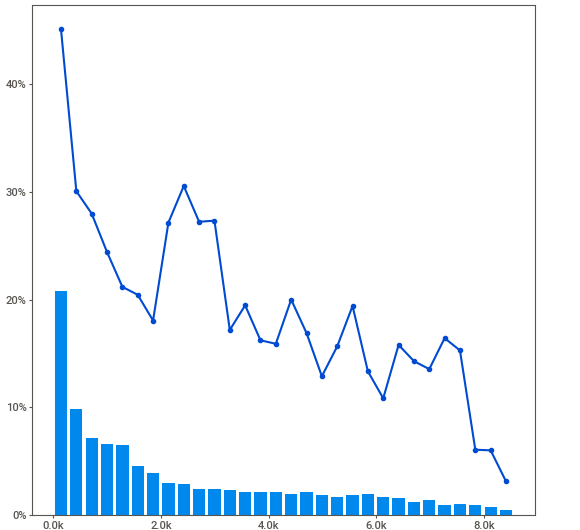
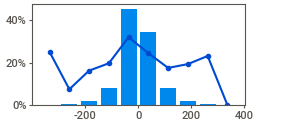
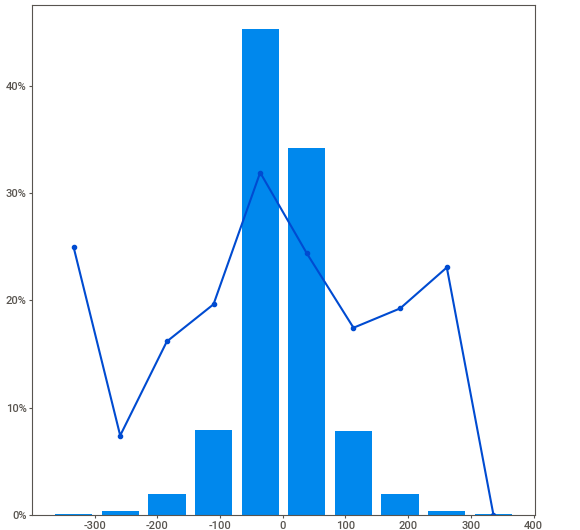
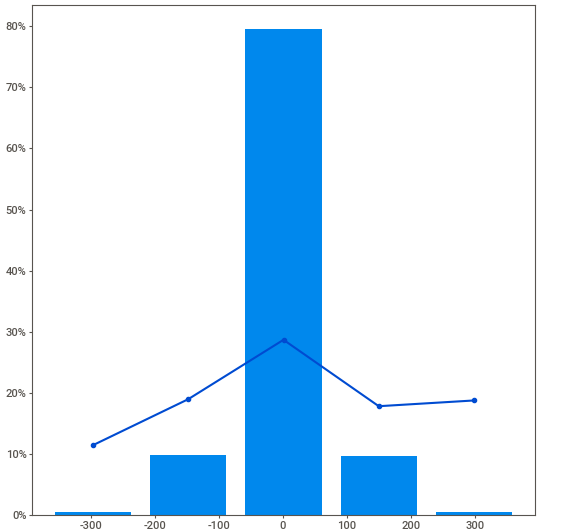
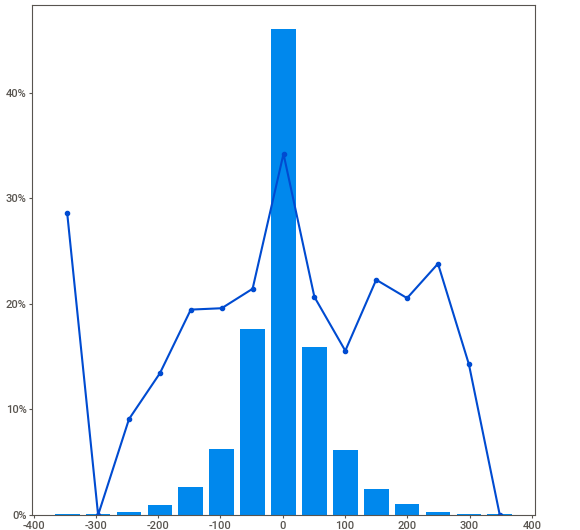
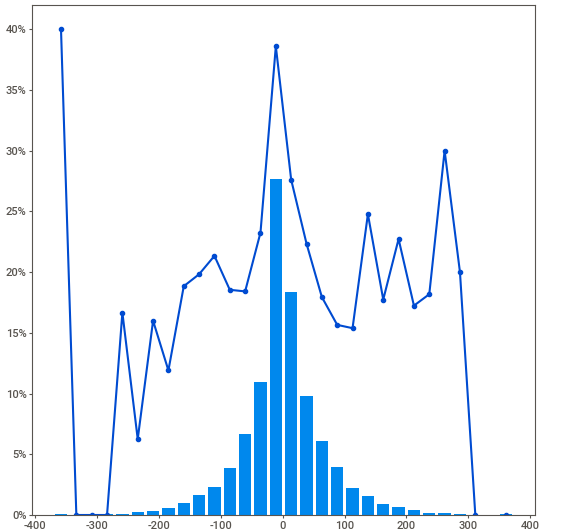
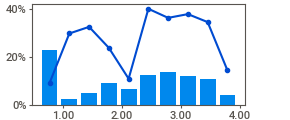
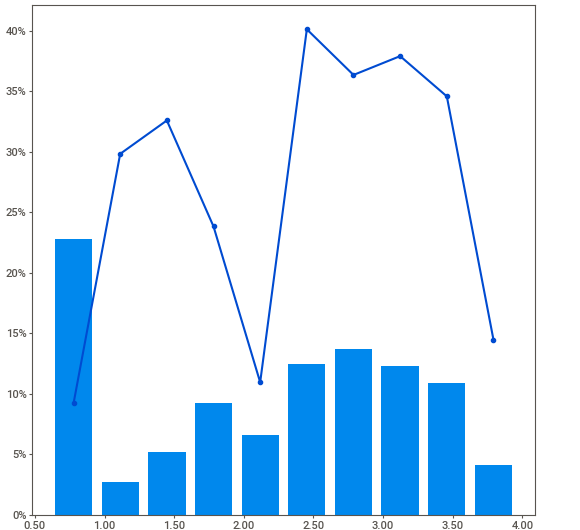
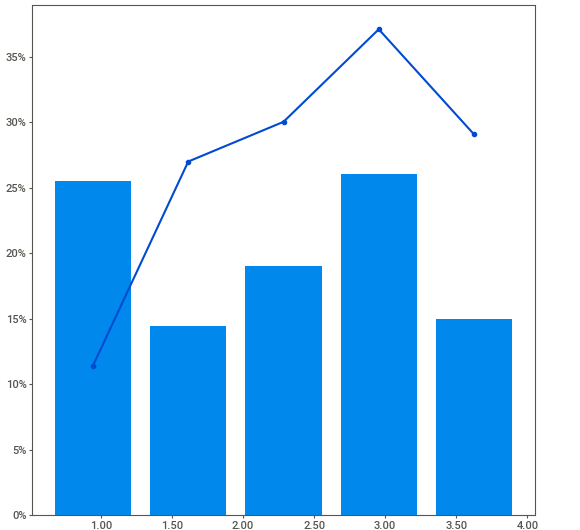
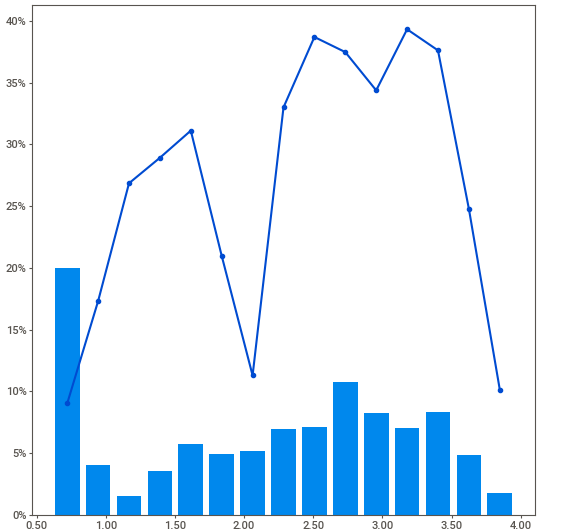
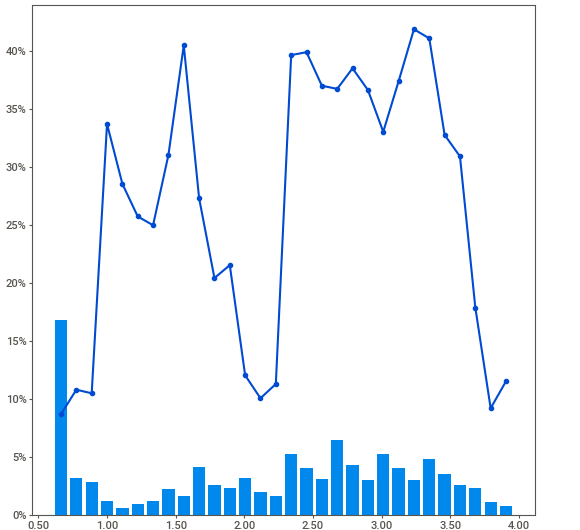
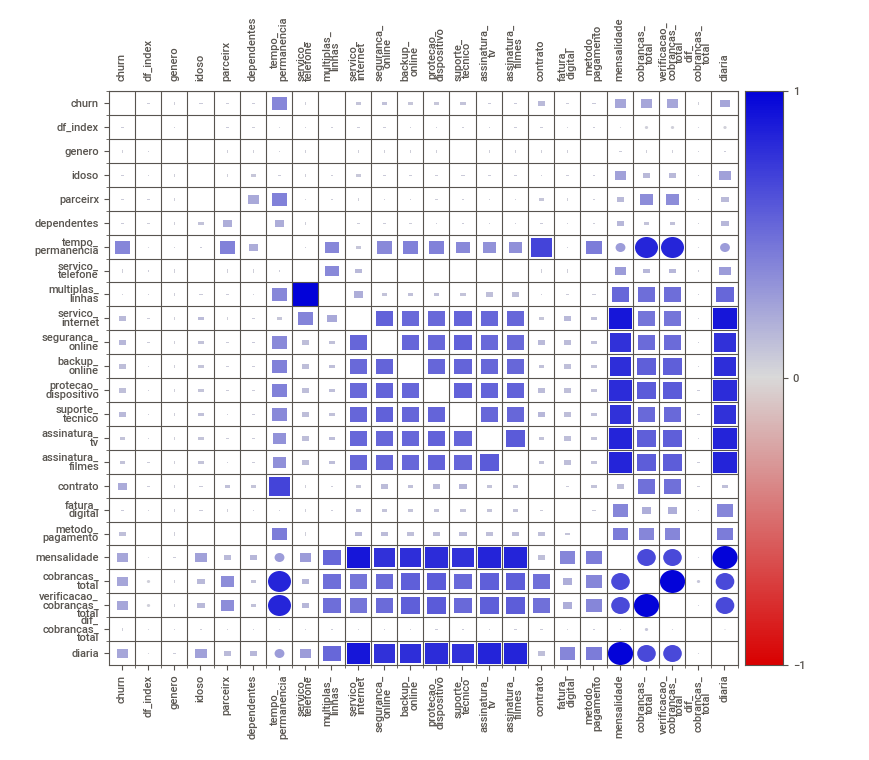
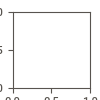

Report SWEETVIZ_REPORT1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report = sv.analyze(dados, 'churn')
report.show_notebook()
report.show_html(layout = 'vertical', filepath='SWEETVIZ_REPORT1.html',)


Com a análise do sweetviz podemos observar que:
 * 27% dos clientes sairam da empresa
 * idosos tem uma maior taxa de evasão assim como pessoas que não tem parceiros ou dependentes
 * Quanto maior o tempo de permanência como cliente, menor a taxa de evasão. A mesma tendência ocorre para a variável cobrancas_total
 * quem tem contrato mensal tem uma maior tendência a deixar de ser cliente
 * A taxa de churn tem uma variação considerável para a variável categórica seriço de internet, sendo quem tem fibra tem uma maior chance de sair (42%) do que aqueles que não possuem internet (7%)

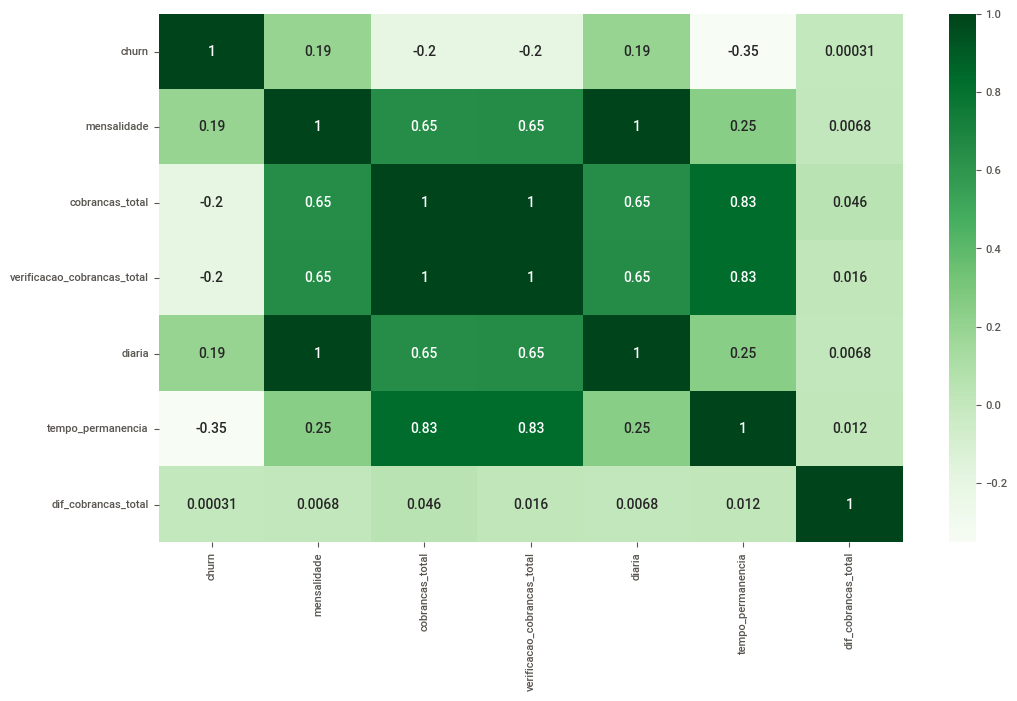

In [ ]:
colunas_a_analisar = list(set(colunas_numericas).union(set(coluna_target)))


plt.figure(figsize=(12, 7))
sns.heatmap(dados[colunas_a_analisar].corr(), annot=True, cmap='Greens')

#### Nota-se que:

* As variáveis mensalidade, cobranças total e tempo de permanência apresentam uma correlação considerável entre si, bem como a variável criada verificação das cobranças total. Esta última será retirada do modelo, bem como a dif_cobrancas_total.
* Ainda, as features tempo_permanencia e cobrancas_total apresentam uma forte correlação (0.83). Não é muito interessantes usar 2 vaiáveis independentes correlacionadas pois isso pode afetar o modelo. Para evitar esse problema, podemos retirar uma dessas variáveis ou aplicar uma regularização L1 que selecionaria as melhores features.

In [ ]:
dados = dados.drop(columns = ['verificacao_cobrancas_total', 'dif_cobrancas_total'], axis=1)
dados

,index,id_cliente,churn,genero,idoso,parceirx,dependentes,tempo_permanencia,servico_telefone,multiplas_linhas,...,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_filmes,contrato,fatura_digital,metodo_pagamento,mensalidade,cobrancas_total,diaria
0,0,0002-ORFBO,0,Feminino,0,1,1,9,1,Não,...,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.60,593.30,2.19
1,1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sim,...,Não,Não,Não,Sim,Mensal,Não,Cheque,59.90,542.40,2.00
2,2,0004-TLHLJ,1,Masculino,0,0,0,4,1,Não,...,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.90,280.85,2.46
3,3,0011-IGKFF,1,Masculino,1,1,0,13,1,Não,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.00,1237.85,3.27
4,4,0013-EXCHZ,1,Feminino,1,1,0,3,1,Não,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7262,9987-LUTYD,0,Feminino,0,0,0,13,1,Não,...,Não,Sim,Não,Não,Anual,Não,Cheque,55.15,742.90,1.84
7039,7263,9992-RRAMN,1,Masculino,0,1,0,22,1,Sim,...,Não,Não,Não,Sim,Mensal,Sim,Cheque Eletrônico,85.10,1873.70,2.84
7040,7264,9992-UJOEL,0,Masculino,0,0,0,2,1,Não,...,Não,Não,Não,Não,Mensal,Sim,Cheque,50.30,92.75,1.68
7041,7265,9993-LHIEB,0,Masculino,0,1,1,67,1,Não,...,Sim,Sim,Não,Sim,Bianual,Não,Cheque,67.85,4627.65,2.26


In [ ]:
pd.options.display.max_columns = 25
dados.loc[dados.servico_telefone == 0].servico_internet.value_counts()

DSL    682
Name: servico_internet, dtype: int64

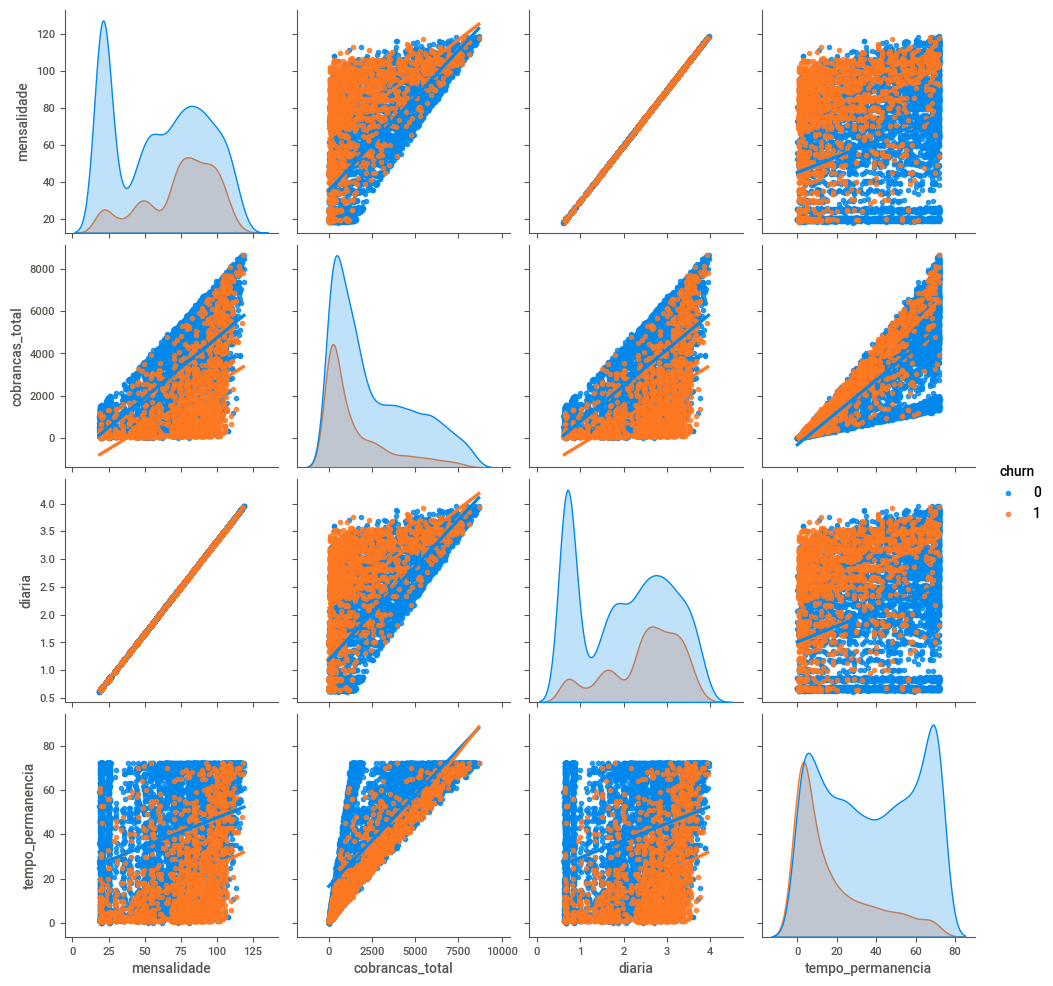

In [ ]:


colunas_a_analisar.remove('verificacao_cobrancas_total')
colunas_a_analisar.remove('dif_cobrancas_total')
sns.pairplot(dados[colunas_a_analisar],
             kind = 'reg',
             hue = 'churn',
            )

### Avaliando as variáveis numéricas

### `tempo_permanencia`

In [ ]:
px.histogram(
  data_frame = dados, 
  x="tempo_permanencia", 
  nbins=40,
  histnorm='probability',
  color="churn",
   marginal="box"
)

* A maior parcela daqueles que sairam da empresa ficaram por um curto período de tempo. Percebe-se uma mediana de 10 meses para aqueles que sairam e um valor de 38 meses como mediana para os que continuaram

###`mensalidade`

In [ ]:
px.histogram(
  data_frame = dados, 
  x="mensalidade", 
  nbins=50,
  histnorm='probability',
  color="churn",
   marginal="box"
)

* Em relação à mensalidade, as pessoas que sairam pagavam uma maior mensalidade

### `cobrancas_total`

In [ ]:
px.histogram(
  data_frame = dados, 
  x="cobrancas_total", 
  #nbins=20,
  histnorm='probability',
  color="churn",
   marginal="box"
)

* Já para as cobranças totais, os que evadiram tem uma menor cobranças total (visto também que ficaram menos tempo como foi observado na feature tempo de permanência

### Avaliando as outras variáveis

### `genero`

In [ ]:
fig = px.box(
    data_frame = dados, 
    y="tempo_permanencia", 
    x = 'churn',
    color = 'genero',     
    title = '<b>Distribuição do tempo de permanência por gênero',
    template = 'plotly_white',
    width=800, 
    height = 400,
)

fig.update_traces(boxmean='sd') # adiciona média e desvio padrão

In [103]:
df_analise = dados.groupby(['genero', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)

px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'genero',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes por  genero/ churn',
  height=300, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,
)

### `idoso`

In [ ]:
fig = px.box(
    data_frame = dados, 
    y="tempo_permanencia", 
    x = 'churn',
    color = 'idoso',     
    title = '<b>Distribuição do tempo de permanência se idoso ou não',
    template = 'plotly_white',
    width=800, 
    height = 400,
)

fig.update_traces(boxmean='sd') # adiciona média e desvio padrão

In [108]:
df_analise = dados.groupby(['idoso', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)

px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'idoso',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes se idoso / churn',
  height=300, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,
)

* a taxa de evasão quando a pessoa é idosa é maior

### `parceirx`

In [ ]:
fig = px.box(
    data_frame = dados, 
    y="tempo_permanencia", 
    x = 'churn',
    color = 'parceirx',     
    title = '<b>Distribuição do tempo de permanência se a pessoa possui parceirx',
    template = 'plotly_white',
    width=800, 
    height = 400,
)

fig.update_traces(boxmean='sd') # adiciona média e desvio padrão

* Nota-se uma grande diferença na distribuição do tempo de permanência para quando a pessoa tem parceirx ou não. Quando não tem, ela possui menos tempo de permanência

In [109]:
df_analise = dados.groupby(['parceirx', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)

px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'parceirx',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes  se tem parceirx / churn',
  height=300, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,

)

* Quem não possui parceirx tem uma maior taxa de evasão

### `dependentes`

In [ ]:
fig = px.box(
    data_frame = dados, 
    y="tempo_permanencia", 
    x = 'churn',
    color = 'dependentes',     
    title = '<b>Distribuição do tempo de permanência ',
    template = 'plotly_white',
    width=800, 
    height = 400,
)

fig.update_traces(boxmean='sd') # adiciona média e desvio padrão

* Quando o cliente tem dependentes, ele fica mais tempo pagando pelo serviço da empresa

In [110]:
df_analise = dados.groupby(['dependentes', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)
df_analise


px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'dependentes',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes  se possui dependentes / churn',
  height=300, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,

)

### `multiplas_linhas` | `servico_telefone`

In [100]:
df_analise = dados.groupby(['multiplas_linhas', 'servico_telefone', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)
df_analise


,multiplas_linhas,servico_telefone,churn,Contagem
0,Não,1,NÃO,2541
1,Não,1,SIM,849
2,Sem telefone,0,NÃO,512
3,Sem telefone,0,SIM,170
4,Sim,1,NÃO,2121
5,Sim,1,SIM,850


* Note que não existe a necessidade da feature servico_telefone para o modelo visto que a coluna multiplas_linhas já tem tanto essa informação quanto se a pessoa paga por mais de uma linha ou não. Dessa forma, a feature será removida

In [102]:
dados = dados.drop(columns = 'servico_telefone', axis=1)
dados.head()

,index,id_cliente,churn,genero,idoso,parceirx,dependentes,tempo_permanencia,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_filmes,contrato,fatura_digital,metodo_pagamento,mensalidade,cobrancas_total,diaria
0,0,0002-ORFBO,0,Feminino,0,1,1,9,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.30,2.19
1,1,0003-MKNFE,0,Masculino,0,0,0,9,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.40,2.00
2,2,0004-TLHLJ,1,Masculino,0,0,0,4,Não,Fibra,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85,2.46
3,3,0011-IGKFF,1,Masculino,1,1,0,13,Não,Fibra,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85,3.27
4,4,0013-EXCHZ,1,Feminino,1,1,0,3,Não,Fibra,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.40,2.80


In [ ]:
fig = px.box(
    data_frame = dados, 
    y="tempo_permanencia", 
    x = 'churn',
    color = 'multiplas_linhas',     
    title = '<b>Distribuição do tempo de permanência quanto ao serviço telefônico',
    template = 'plotly_white',
    width=800, 
    height = 400,
)

fig.update_traces(boxmean='sd') # adiciona média e desvio padrão

In [107]:
df_analise = dados.groupby(['multiplas_linhas', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)

px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'multiplas_linhas',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes por linhas telefônicas / churn',
  height=300, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,
)

`servico_internet` 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',

In [126]:
df_analise = dados.groupby([ 
                            'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)


px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'seguranca_online',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes seguranca e suporte/ churn',
  height=700, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=False,
  facet_row = 'backup_online',
  facet_col = 'protecao_dispositivo',
  hover_data = ['suporte_tecnico']
)


* Quando o cliente não tem protecao_dispositivo nem backup_online, ele tem uma maior taxa de evasão

### `assinatura_tv`, `assinatura_filmes`

In [114]:
df_analise = dados.groupby(['assinatura_tv', 'assinatura_filmes', 'churn'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)

px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'assinatura_tv',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes por assinatura / churn',
  height=700, 
  width=900,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,
  facet_row = 'assinatura_filmes'
)


* Note que não tem como a pessoa assinar filmes ou tv sem assinar internet. Dessa forma, a informação da feature servico_internet já está sendo mostrada pelas colunas de assinatura. Com isso, pode ser retirada do modelo. O mesmo acontece com as outras colunas associadas ao serviço de internet como seguranca_online, bakup_online, protecao_dispositivo e suporte_tecnico

In [129]:
dados = dados.drop(columns = ['servico_internet'], axis=1)
dados.head()

,index,id_cliente,churn,genero,idoso,parceirx,dependentes,tempo_permanencia,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_filmes,contrato,fatura_digital,metodo_pagamento,mensalidade,cobrancas_total,diaria
0,0,0002-ORFBO,0,Feminino,0,1,1,9,Não,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque,65.6,593.30,2.19
1,1,0003-MKNFE,0,Masculino,0,0,0,9,Sim,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque,59.9,542.40,2.00
2,2,0004-TLHLJ,1,Masculino,0,0,0,4,Não,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.9,280.85,2.46
3,3,0011-IGKFF,1,Masculino,1,1,0,13,Não,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.0,1237.85,3.27
4,4,0013-EXCHZ,1,Feminino,1,1,0,3,Não,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque,83.9,267.40,2.80


# `contrato`, `fatura_digital`, `metodo_pagamento`

In [96]:
df_analise = dados.groupby(['metodo_pagamento', 'churn', 'fatura_digital', 'contrato'], as_index = False ) \
                      .cobrancas_total.count()
df_analise['churn'] = df_analise.churn.map({0: 'NÃO', 1: 'SIM'})
df_analise.rename({'cobrancas_total': 'Contagem'}, inplace=True, axis=1)
df_analise


px.bar(
  data_frame = df_analise, 
  y = 'Contagem',
  x = 'metodo_pagamento',

  color = 'churn',
  barmode = 'group',
  title = 'Quantidade de clientes por metodo de pagamento, contrato e tipo de fatura',
  height=500, 
  width=1000,
  color_discrete_map = { 
      'NÃO' : 'lightgreen' , 
      "SIM" : 'tomato'
    },
  text_auto=True,
  #hover_data = ['contrato', 'fatura_digital'],
                facet_row="fatura_digital", facet_col="contrato",


)



* Nota-se que a maior parte dos churns vem daqueles com contrato mensal. Dentro desses, os que pagam em cheque eletrônico se destacam como maior evasão. Assim, acredita-se que serão características importantes na predição do churn

### Salvando os dados limpos

In [130]:
dados.to_csv('Telco-Customer-Churn_for_model.csv', index = False)